## ***15.CLUSTERING***

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import seaborn as sns

In [ ]:
airline=pd.read_csv('EastWestAirlines.csv')

In [ ]:
airline_copy=airline.copy()

#### 1]Data Preproceessing

In [ ]:
airline.head()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1


In [ ]:
airline.dtypes

,0
ID#,int64
Balance,int64
Qual_miles,int64
cc1_miles,int64
cc2_miles,int64
cc3_miles,int64
Bonus_miles,int64
Bonus_trans,int64
Flight_miles_12mo,int64
Flight_trans_12,int64


In [ ]:
airline.isna().sum()

,0
ID#,0
Balance,0
Qual_miles,0
cc1_miles,0
cc2_miles,0
cc3_miles,0
Bonus_miles,0
Bonus_trans,0
Flight_miles_12mo,0
Flight_trans_12,0


In [ ]:
airline.duplicated().sum()

np.int64(0)

In [ ]:
airline['Award?'].unique()

array([0, 1])

In [ ]:
airline.shape

(3999, 12)

In [ ]:
features=airline.drop(columns=['ID#'])
features.head()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,28143,0,1,1,1,174,1,0,0,7000,0
1,19244,0,1,1,1,215,2,0,0,6968,0
2,41354,0,1,1,1,4123,4,0,0,7034,0
3,14776,0,1,1,1,500,1,0,0,6952,0
4,97752,0,4,1,1,43300,26,2077,4,6935,1


<Axes: >

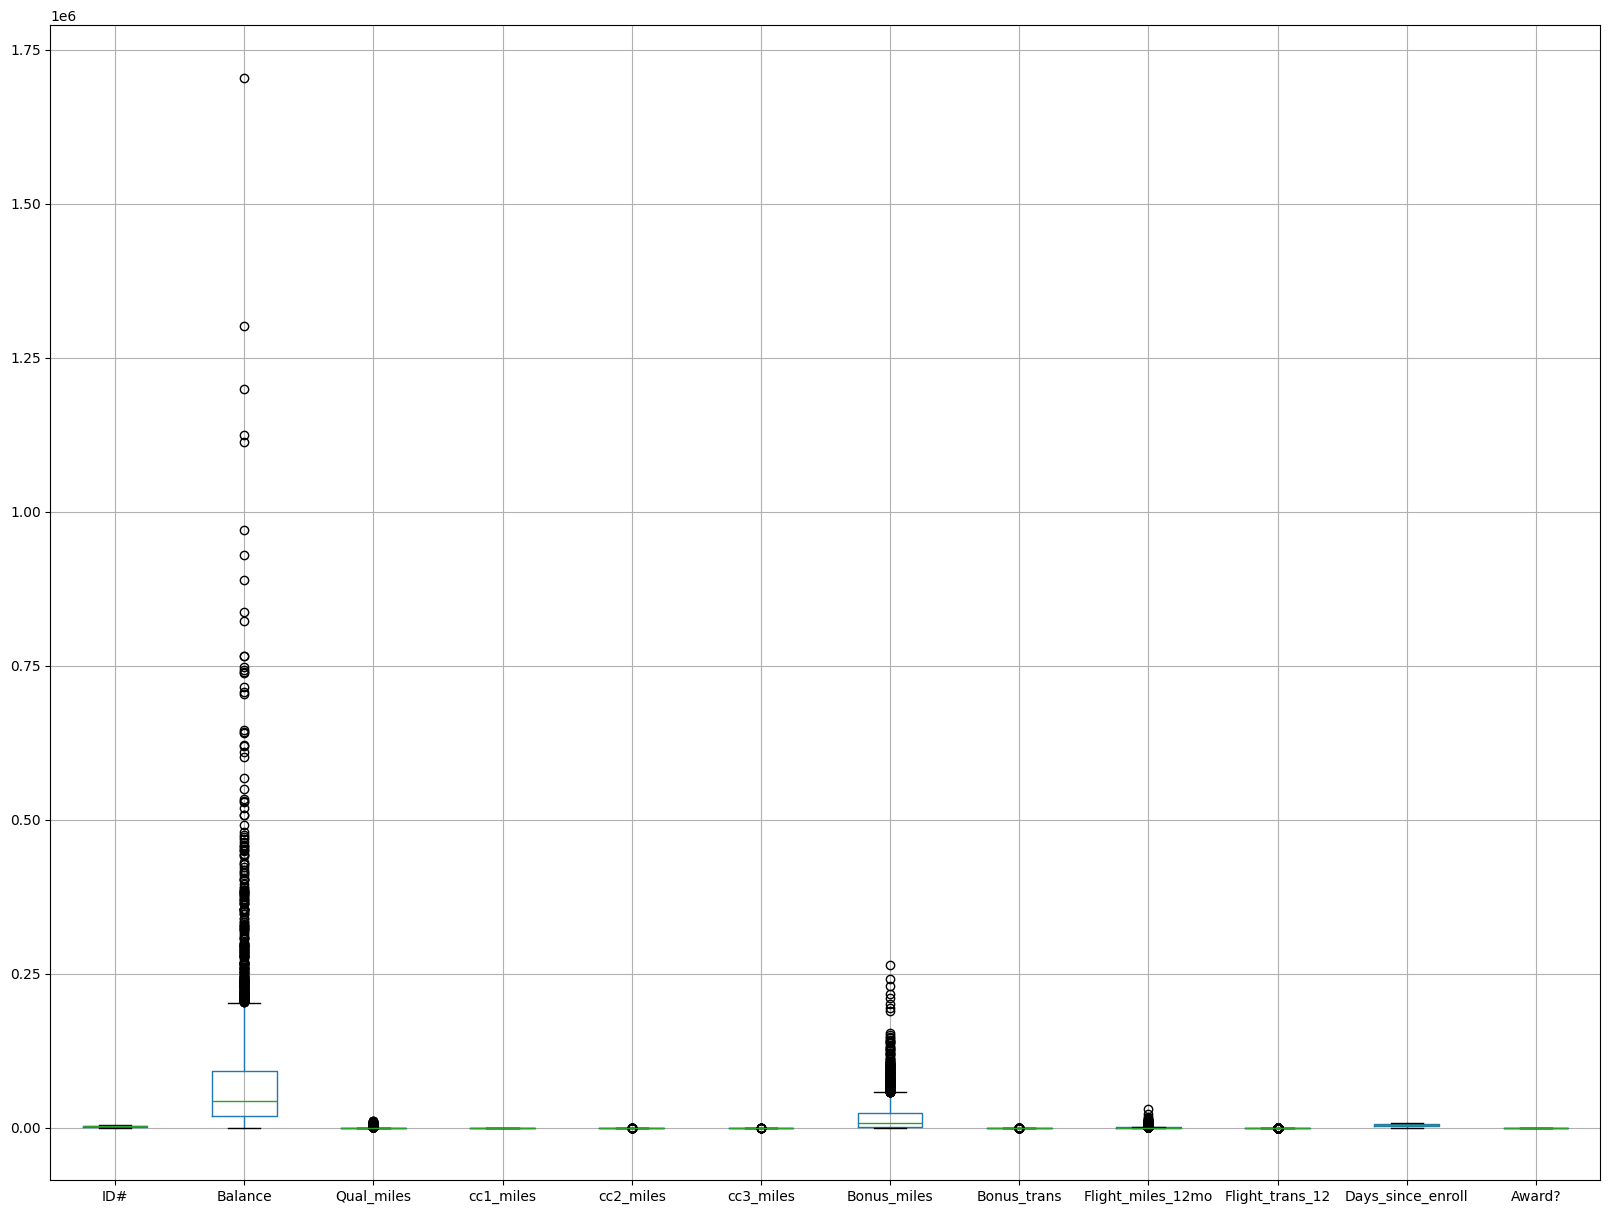

In [ ]:
plt.figure(figsize=(20,15))
airline.boxplot()

In [ ]:
def outlier_capping(features,col):
 Q1=features[col].quantile(0.25)
 Q3=features[col].quantile(0.75)
 IQR=Q3-Q1
 UE=Q3+1.5*IQR
 LE=Q1-1.5*IQR
 features[col]=features[col].apply(lambda x:UE if x>UE else LE if x<LE else x)
for col in features.select_dtypes(['float','int']).columns:
 outlier_capping(features,col)

<Axes: >

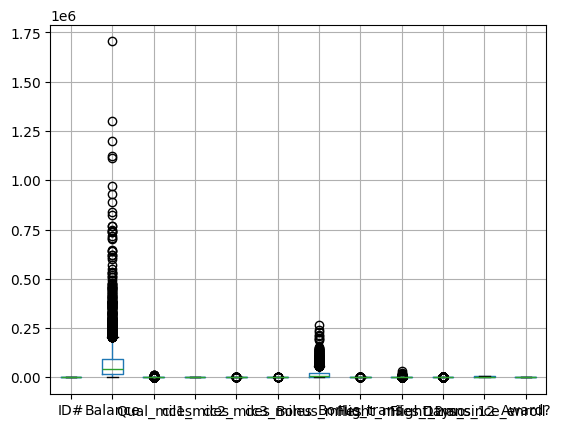

In [ ]:
features.boxplot()

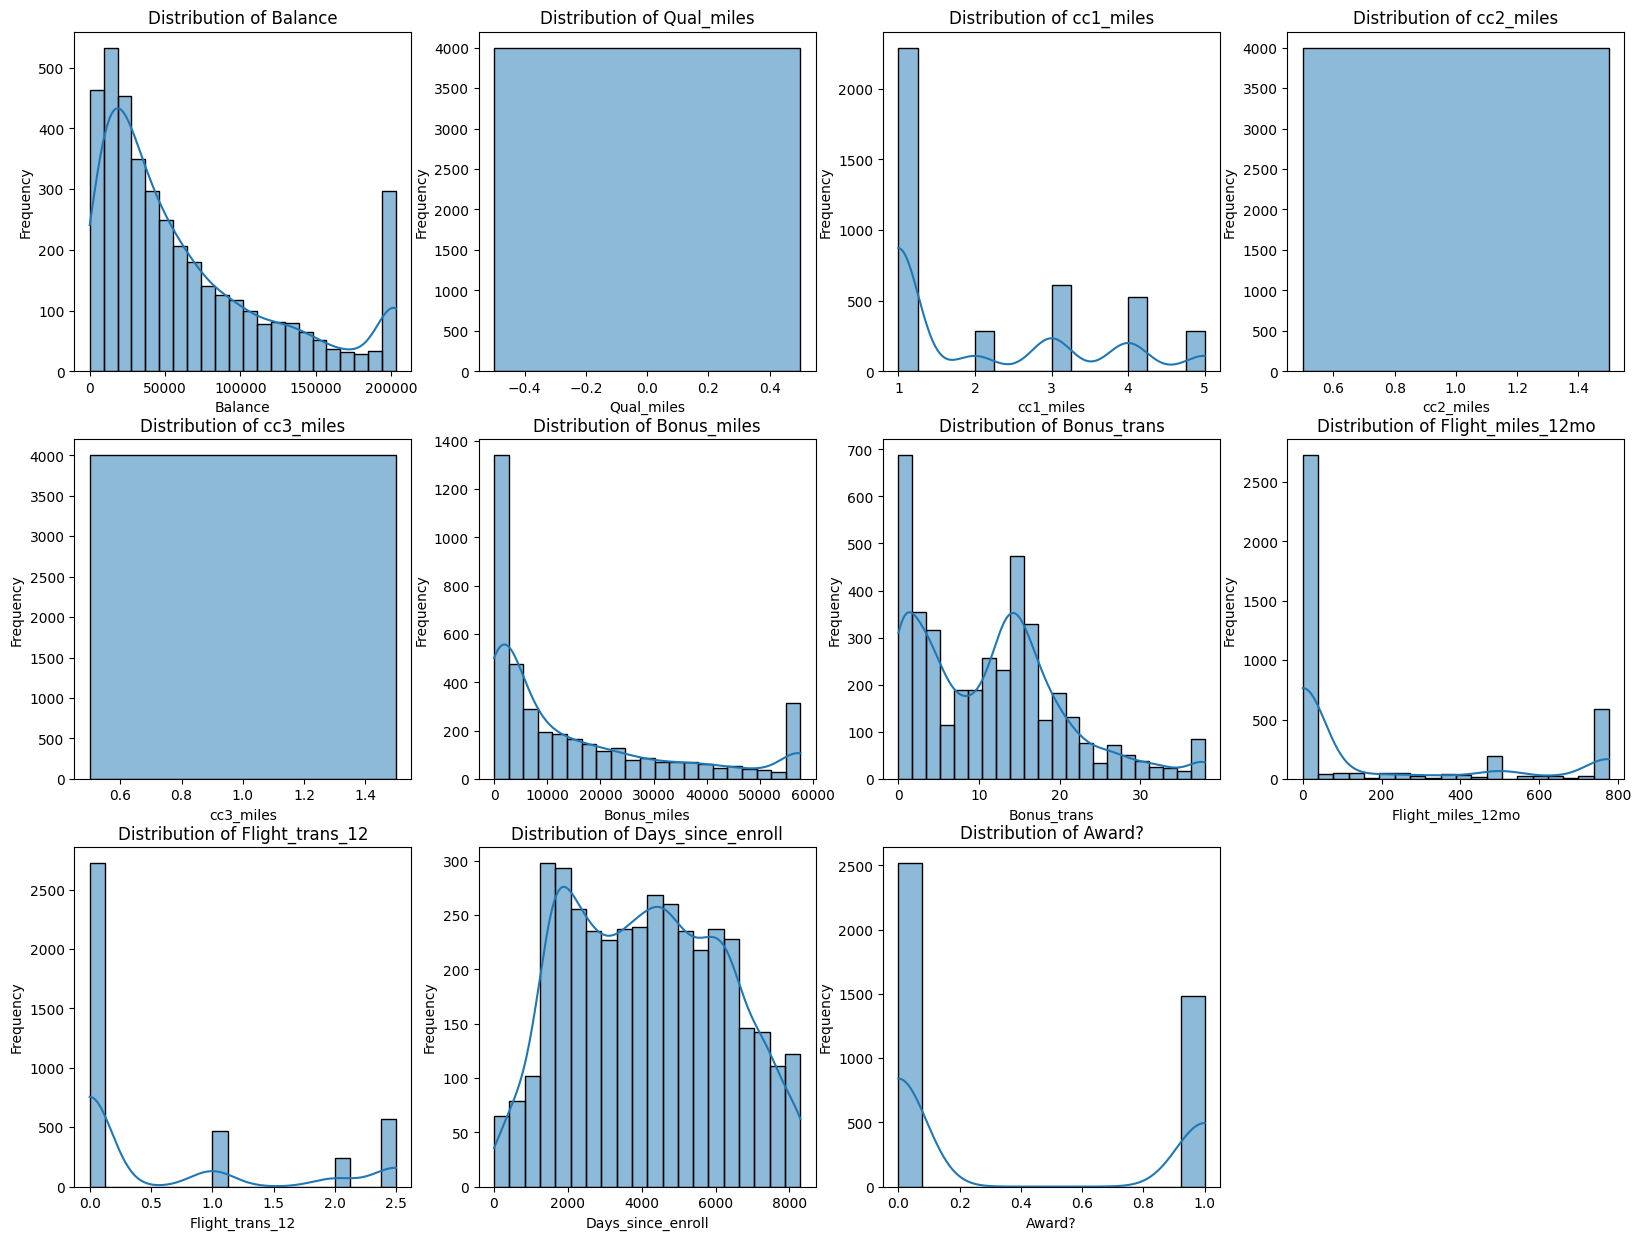

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns


plt.figure(figsize=(20, 15))

# Get numerical columns, excluding 'ID#' (which is already excluded in 'features')
numerical_cols_to_plot = features.select_dtypes(include=np.number).columns

for i, col in enumerate(numerical_cols_to_plot):
    plt.subplot(3, 4, i + 1)
    sns.histplot(features[col], kde=True)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
plt.show()

In [ ]:
'''
Balance: This histogram would show the distribution of customer balances. we  might see a right-skewed distribution, indicating that most customers have lower balances, with a few having very high balances.
Qual_miles: This would likely be heavily skewed towards zero, indicating that a large number of customers have no qualifying miles.
cc1_miles, cc2_miles, cc3_miles: These are likely categorical-like features (representing credit card tiers) and their histograms would show bars at discrete values (e.g., 0, 1, 2, 3, 4 for cc1_miles), indicating the frequency of each card type.
Bonus_miles, Bonus_trans, Flight_miles_12mo, Flight_trans_12: These generally show right-skewed distributions, meaning most customers have fewer bonus miles, transactions, or flight miles, with a long tail of highly active customers.
Days_since_enroll: This would show the distribution of how long customers have been enrolled. It might be a more spread-out distribution, potentially with multiple peaks, depending on the enrollment patterns over time.
Award?: This is a binary variable (0 or 1), so its histogram would just show two bars representing the count of customers who have or have not received an award.
'''




'\nBalance: This histogram would show the distribution of customer balances. we  might see a right-skewed distribution, indicating that most customers have lower balances, with a few having very high balances.\nQual_miles: This would likely be heavily skewed towards zero, indicating that a large number of customers have no qualifying miles.\ncc1_miles, cc2_miles, cc3_miles: These are likely categorical-like features (representing credit card tiers) and their histograms would show bars at discrete values (e.g., 0, 1, 2, 3, 4 for cc1_miles), indicating the frequency of each card type.\nBonus_miles, Bonus_trans, Flight_miles_12mo, Flight_trans_12: These generally show right-skewed distributions, meaning most customers have fewer bonus miles, transactions, or flight miles, with a long tail of highly active customers.\nDays_since_enroll: This would show the distribution of how long customers have been enrolled. It might be a more spread-out distribution, potentially with multiple peaks, dep

#### 2]Implementing Clustering Algorithm

In [ ]:
# Normalization function
def norm_func(i):
    x = (i-i.min())/(i.max()-i.min())
    return (x)

In [ ]:
data_norm=norm_func(airline_copy.iloc[:,1:11])

In [ ]:
data_norm.head()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll
0,0.016508,0.0,0.00,0.0,0.0,0.000660,0.011628,0.000000,0.000000,0.843742
1,0.011288,0.0,0.00,0.0,0.0,0.000815,0.023256,0.000000,0.000000,0.839884
2,0.024257,0.0,0.00,0.0,0.0,0.015636,0.046512,0.000000,0.000000,0.847842
3,0.008667,0.0,0.00,0.0,0.0,0.001896,0.011628,0.000000,0.000000,0.837955
4,0.057338,0.0,0.75,0.0,0.0,0.164211,0.302326,0.067398,0.075472,0.835905


In [ ]:
model=KMeans(n_clusters=5).fit(data_norm)
model.inertia_
#WCSS (Within Cluster Sum of Square)

248.3978372766213

In [ ]:
WCSS=[]
for i in range(1,10):
  model=KMeans(n_clusters=i).fit(data_norm)
  WCSS.append(model.inertia_)
WCSS

[898.2705822007482,
 448.9998867355651,
 389.73399526232504,
 361.12661178414237,
 254.3958998176656,
 229.37443020534462,
 200.74727261124988,
 182.73732476597874,
 182.3513359312426]

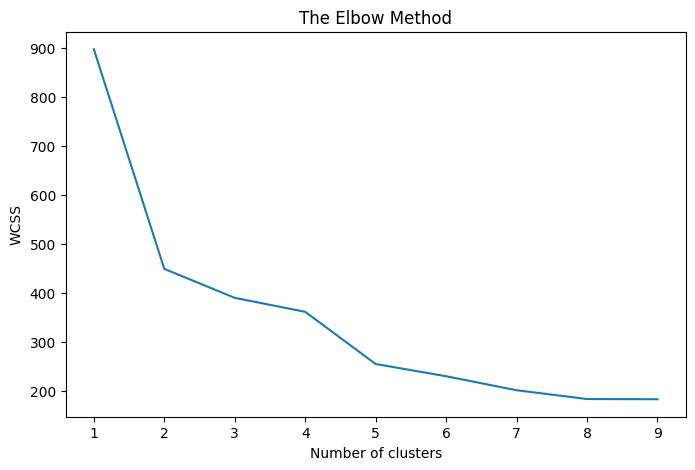

In [ ]:
fig=plt.figure(figsize=(8,5))
plt.plot(range(1,10),WCSS)
plt.title("The Elbow Method")
plt.xlabel("Number of clusters")
plt.ylabel("WCSS")
plt.show()

In [ ]:

clf=KMeans(n_clusters=3)
clf.fit(data_norm)

KMeans(n_clusters=3)

In [ ]:
y_names=clf.predict(data_norm)

In [ ]:
clf.cluster_centers_
#centers of clusters

array([[0.0236968 , 0.01096235, 0.02754237, 0.01094633, 0.00123588,
        0.01748617, 0.08390816, 0.01278401, 0.02177273, 0.26345878],
       [0.06637993, 0.01287489, 0.69452297, 0.00070671, 0.00618375,
        0.15006833, 0.22046183, 0.01631145, 0.02814854, 0.56666695],
       [0.0386667 , 0.01537325, 0.03210616, 0.01070205, 0.00149829,
        0.01961353, 0.09308299, 0.01585339, 0.02823727, 0.69343452]])

In [ ]:
clf.inertia_ #WCSS  distances for k=3

331.4324734536579

In [ ]:
md=pd.Series(y_names)
data_norm['clust']=md
data_norm

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,clust
0,0.016508,0.0,0.00,0.0,0.0,0.000660,0.011628,0.000000,0.000000,0.843742,2
1,0.011288,0.0,0.00,0.0,0.0,0.000815,0.023256,0.000000,0.000000,0.839884,2
2,0.024257,0.0,0.00,0.0,0.0,0.015636,0.046512,0.000000,0.000000,0.847842,2
3,0.008667,0.0,0.00,0.0,0.0,0.001896,0.011628,0.000000,0.000000,0.837955,2
4,0.057338,0.0,0.75,0.0,0.0,0.164211,0.302326,0.067398,0.075472,0.835905,1
...,...,...,...,...,...,...,...,...,...,...,...
3994,0.010837,0.0,0.00,0.0,0.0,0.032330,0.046512,0.006490,0.018868,0.168917,0
3995,0.037766,0.0,0.00,0.0,0.0,0.003720,0.058140,0.000000,0.000000,0.167953,0
3996,0.043169,0.0,0.50,0.0,0.0,0.096505,0.093023,0.000000,0.000000,0.168797,1
3997,0.032202,0.0,0.00,0.0,0.0,0.001896,0.011628,0.016225,0.018868,0.168676,0


In [ ]:
data_norm.iloc[:,0:].groupby(data_norm.clust).mean()
 #this code computes the centroid (the average point) of each cluster in the feature space, where each cluster is in the n-dimensional space where n is the number of columns in data_norm.

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,clust
clust,,,,,,,,,,,
0,0.023636,0.010970,0.027562,0.010954,0.001237,0.017470,0.083926,0.012782,0.021735,0.263308,0.0
1,0.066380,0.012875,0.694523,0.000707,0.006184,0.150068,0.220462,0.016311,0.028149,0.566667,1.0
2,0.038728,0.015360,0.032079,0.010693,0.001497,0.019631,0.093053,0.015854,0.028278,0.693249,2.0


In [ ]:
airline_copy['clust']=md
airline_copy

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,clust
0,1,28143,0,1,1,1,174,1,0,0,7000,0,2
1,2,19244,0,1,1,1,215,2,0,0,6968,0,2
2,3,41354,0,1,1,1,4123,4,0,0,7034,0,2
3,4,14776,0,1,1,1,500,1,0,0,6952,0,2
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1,0
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1,0
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1,1
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0,0


DBSCAN

In [ ]:
array=airline_copy.values

In [ ]:
from sklearn.preprocessing import StandardScaler
stscaler = StandardScaler().fit(array)
X = stscaler.transform(array)

In [ ]:
X

array([[-1.73512503e+00, -4.51140783e-01, -1.86298687e-01, ...,
         1.39545434e+00, -7.66919299e-01,  1.32443657e+00],
       [-1.73426342e+00, -5.39456874e-01, -1.86298687e-01, ...,
         1.37995704e+00, -7.66919299e-01,  1.32443657e+00],
       [-1.73340181e+00, -3.20031232e-01, -1.86298687e-01, ...,
         1.41192021e+00, -7.66919299e-01,  1.32443657e+00],
       ...,
       [ 1.72682006e+00, -4.29480975e-05, -1.86298687e-01, ...,
        -1.31560393e+00,  1.30391816e+00,  7.67518013e-02],
       [ 1.72768167e+00, -1.85606976e-01, -1.86298687e-01, ...,
        -1.31608822e+00, -7.66919299e-01, -1.17093297e+00],
       [ 1.72854328e+00, -7.00507951e-01, -1.86298687e-01, ...,
        -1.31754109e+00, -7.66919299e-01, -1.17093297e+00]])

In [ ]:
from sklearn.cluster import DBSCAN
# randomly taking values of parameters
dbscan = DBSCAN(eps=0.8, min_samples=6)
dbscan.fit

<bound method DBSCAN.fit of DBSCAN(eps=0.8, min_samples=6)>

In [ ]:
dbscan.fit_predict(X)

array([0, 0, 0, ..., 2, 5, 5])

In [ ]:
cl=pd.DataFrame(dbscan.labels_,columns=['cluster'])

In [ ]:
pd.concat([airline_copy,cl],axis=1)

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,clust,cluster
0,1,28143,0,1,1,1,174,1,0,0,7000,0,2,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0,2,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0,2,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0,2,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1,1,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1,0,6
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1,0,6
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1,1,2
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0,0,5


In [ ]:
from sklearn.neighbors import NearestNeighbors
neigh= NearestNeighbors()
nbrs=neigh.fit(X)
distances,indices=nbrs.kneighbors(X)

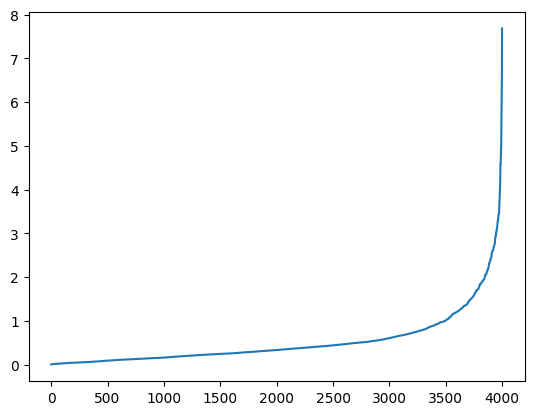

In [ ]:
distances=np.sort(distances,axis=0)
distances=distances[:,1]
plt.plot(distances)

In [ ]:
eps=np.arange(0.1,5,0.2)
min_samples=range(5,20)

In [ ]:
output=[]
for i in eps:
  for j in min_samples:
    labels=DBSCAN(eps=i,min_samples=j).fit(X).labels_
    score=silhouette_score(X,labels)
    output.append([i,j,score])
print(output)

[[np.float64(0.1), 5, np.float64(-0.3292974009171628)], [np.float64(0.1), 6, np.float64(-0.3424976279225324)], [np.float64(0.1), 7, np.float64(-0.343854649734995)], [np.float64(0.1), 8, np.float64(-0.3435387971325537)], [np.float64(0.1), 9, np.float64(-0.30675685942818187)], [np.float64(0.1), 10, np.float64(-0.30724984966459046)], [np.float64(0.1), 11, np.float64(-0.3089046841030547)], [np.float64(0.1), 12, np.float64(-0.09525459420294916)], [np.float64(0.1), 13, np.float64(-0.09561113597708722)], [np.float64(0.1), 14, np.float64(-0.09561113597708722)], [np.float64(0.1), 15, np.float64(-0.09675471813407961)], [np.float64(0.1), 16, np.float64(-0.05848200692288521)], [np.float64(0.1), 17, np.float64(-0.05884589992579038)], [np.float64(0.1), 18, np.float64(-0.05884589992579038)], [np.float64(0.1), 19, np.float64(-0.059717291217165396)], [np.float64(0.30000000000000004), 5, np.float64(-0.36323791426964747)], [np.float64(0.30000000000000004), 6, np.float64(-0.32079588937602127)], [np.float6

In [ ]:
a=pd.DataFrame(output,columns=['eps','min_samples','score'])
max_score = a['score'].max()
print(f"Max Silhouette Score: {max_score:.4f}")
#rows where we have max_score
a[a['score']==max_score]

Max Silhouette Score: 0.6085


,eps,min_samples,score
222,2.9,17,0.608456


In [ ]:
db=DBSCAN(eps=2.9,min_samples=17)
db.fit(X)

DBSCAN(eps=2.9, min_samples=17)

#### 4]Visualisation

#### 5]Evaluation and Performance Metrics

In [ ]:
from sklearn.metrics import silhouette_score
silhouette_score(X,db.labels_)

np.float64(0.6084707037011038)

<Axes: xlabel='Balance', ylabel='Bonus_miles'>

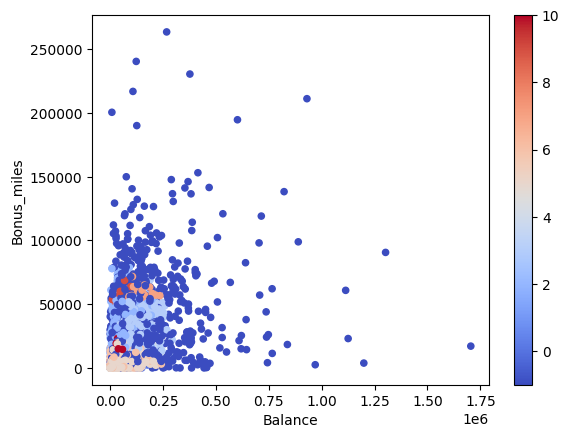

In [ ]:
airline_copy.plot(x='Balance',y='Bonus_miles',c=dbscan.labels_,kind="scatter",cmap="coolwarm")

In [ ]:
silhouette_max = silhouette_score(data_norm.drop(columns=['clust']), data_norm['clust'])
silhouette_max

np.float64(0.40383644873633734)

<Axes: xlabel='Balance', ylabel='Bonus_miles'>

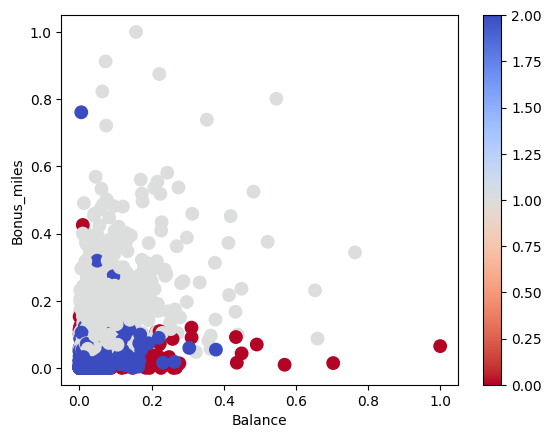

In [ ]:
data_norm.plot(x='Balance',y='Bonus_miles',c=clf.labels_,kind='scatter',s=80,cmap=plt.cm.coolwarm_r)

<Axes: xlabel='Balance', ylabel='Bonus_miles'>

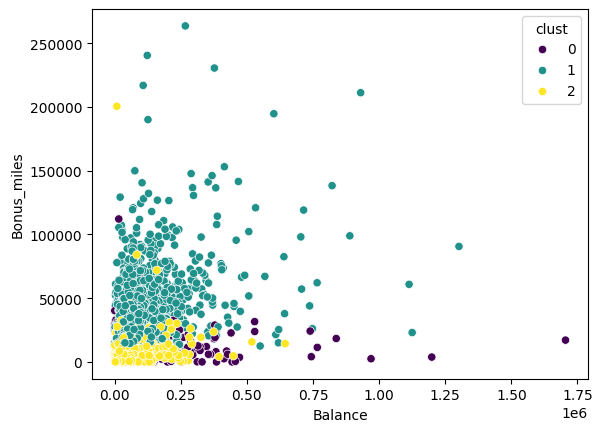

In [ ]:
sns.scatterplot(x='Balance',y='Bonus_miles',hue='clust',data=airline_copy,palette='viridis')

Silhouette Score for K-Means Clustering:** `0.4037`

Silhouette Score for DBSCAN Clustering:** 0.608



.

In this comparison:
- **DBSCAN (0.608)** achieved a higher silhouette score than **K-Means (0.4037)**.
- This suggests that, for the given `EastWestAirlines` dataset, the clusters formed by DBSCAN are **better defined and more separated** than those formed by K-Means.



*   **DBSCAN's Strength:** The higher score for DBSCAN indicates that it was more effective in identifying dense regions of data points and separating them, potentially handling noise and outliers better than K-Means. This often means that the clusters are more internally cohesive and distinct from each other.

*   **K-Means' Limitation:** The lower score for K-Means might imply that its spherical cluster assumption or its reliance on a pre-defined number of clusters (which was 3 based on the Elbow method) did not perfectly align with the underlying structure of the data. Some data points might be ambiguously positioned between clusters, or the clusters might not be perfectly convex.

**Conclusion:** Based on the silhouette scores, **DBSCAN demonstrates superior clustering quality** on this dataset compared to K-Means, suggesting that its density-based approach better captures the natural groupings of the airline customer data.